In [8]:
import numpy as np
import albumentations as A
from matplotlib import pyplot as plt

DATASET_PATH = "../h2/dataset.npz"

data = np.load(DATASET_PATH)


training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

In [9]:
print(X_train.shape)
X_train = X_train[..., np.newaxis] / 255
print(X_train.shape)

(2615, 64, 128)
(2615, 64, 128, 1)


In [10]:
# Plot the data. The number of images being displayed are rows X cols
def plot(data, mask=None, num_images=10, rows=4, cols=8):
  # Reshape if needed (e.g., remove channel dimension for grayscale images)
  if data.shape[-1] == 1:  # Grayscale case
    data = data.squeeze(axis=-1)  # Remove channel dimension
  
  if mask is None:
    # Plot settings
    _, axes = plt.subplots(rows, cols, figsize=(12, 6))  # Adjust figure size as needed
  
    # Display images
    for i, ax in enumerate(axes.flat):
      if i < len(data):  # Check if there are enough images
        ax.imshow(data[i], cmap='gray' if len(data[i].shape) == 2 else None)
        ax.axis('off')  # Hide axes
      else:
        ax.axis('off')  # Hide any empty subplot
  
    plt.tight_layout()
    plt.show()
  else:
    num_samples = num_images  # Number of images to display
    if num_samples < 4:
      num_samples = 4

    # Plot settings
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 2))

    for i in range(num_samples):
      # Original image
      axes[i, 0].imshow(data[i], cmap="gray")
      axes[i, 0].set_title(f"Image {i+1}")
      axes[i, 0].axis("off")

      # Corresponding mask
      axes[i, 1].imshow(mask[i], cmap="viridis", alpha=0.8)  # Adjust cmap as needed
      axes[i, 1].set_title(f"Mask {i+1}")
      axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

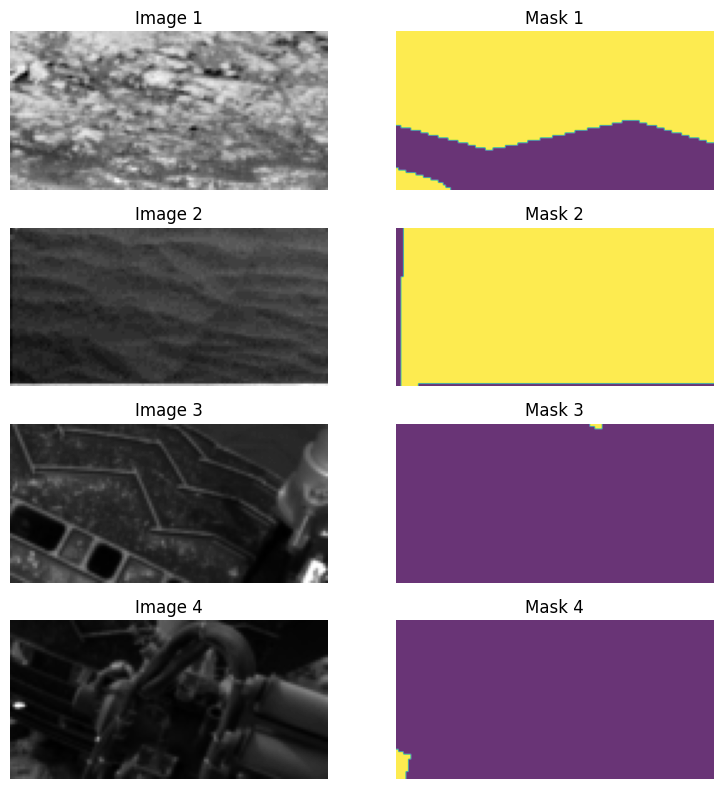

In [14]:
plot(X_train, y_train, num_images=4)

In [21]:
transform = A.Compose([
    A.GridElasticDeform(num_grid_xy=(4, 4), magnitude=10, p=0.5),
    A.XYMasking(),
    A.ShiftScaleRotate()
])

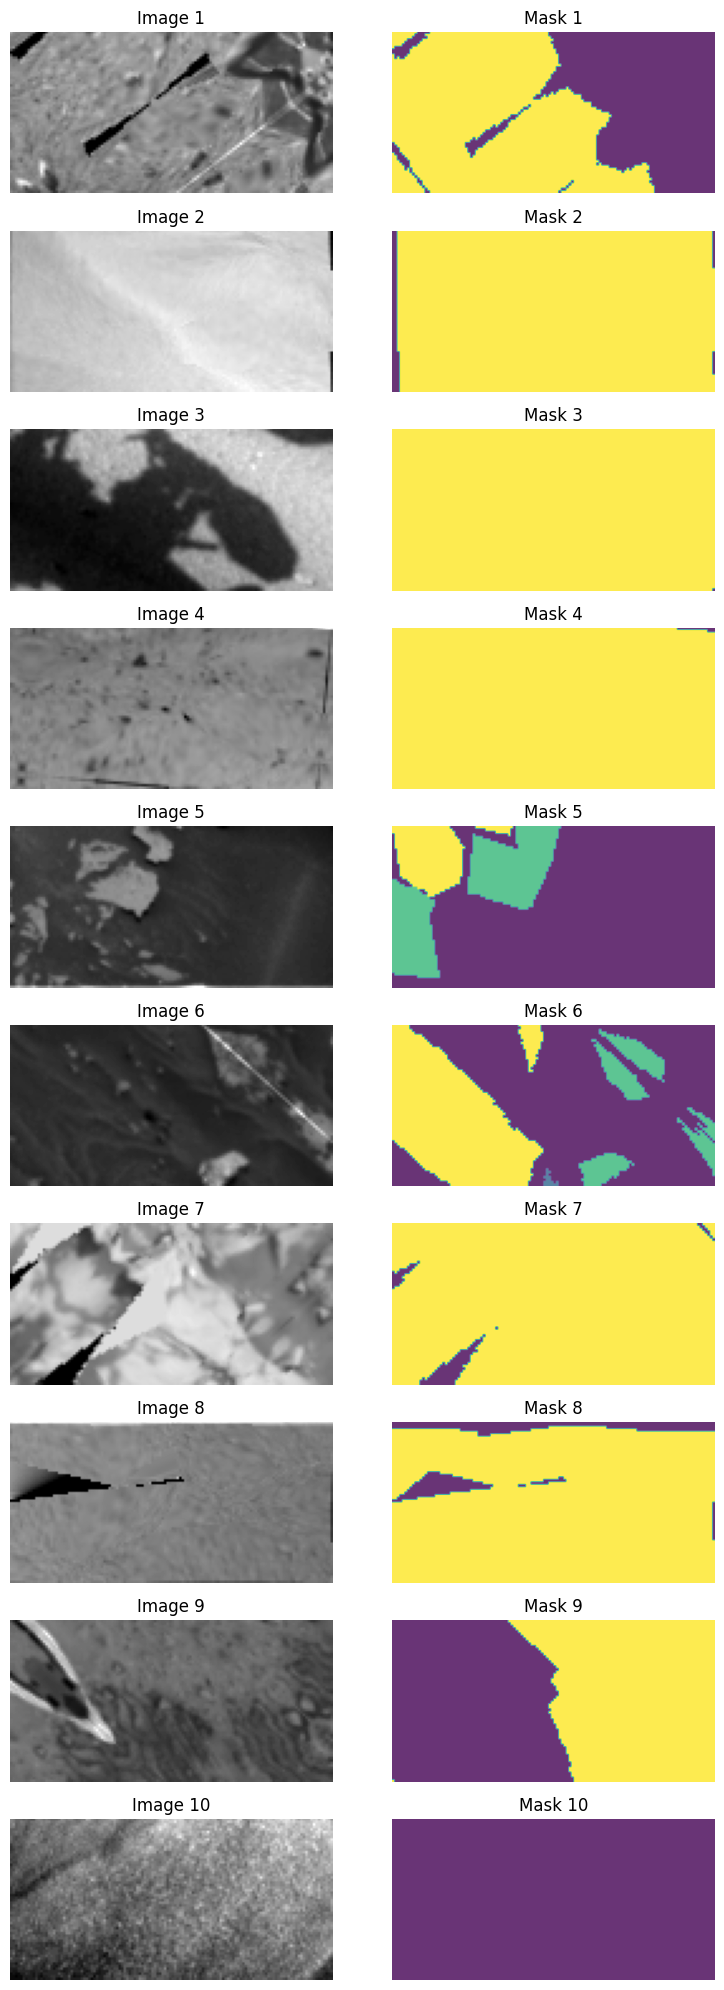

In [35]:
aug_x = []
aug_y = []

n = 10

random_indices = np.random.randint(0, len(X_train), n) 

for i in range(n):
    idx = random_indices[i]
    augmented = transform(image=X_train[idx], mask=y_train[idx])
    aug_x.append(augmented["image"])
    aug_y.append(augmented["mask"])

plot(np.array(aug_x), np.array(aug_y), num_images=n)